In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [5]:
# Load the dataset
df = pd.read_csv('CarPrice_Assignment (1).csv')

# Display the first few rows
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.info())


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 n

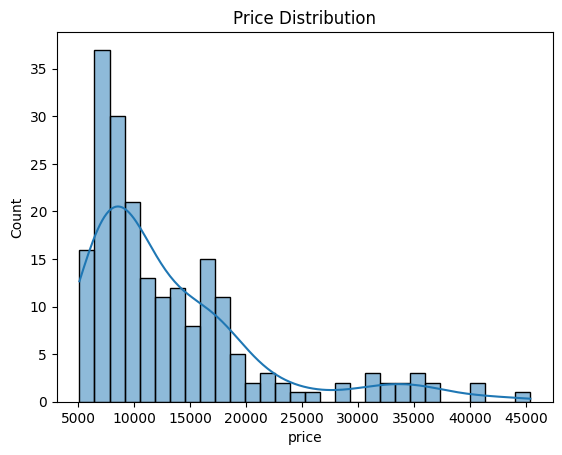

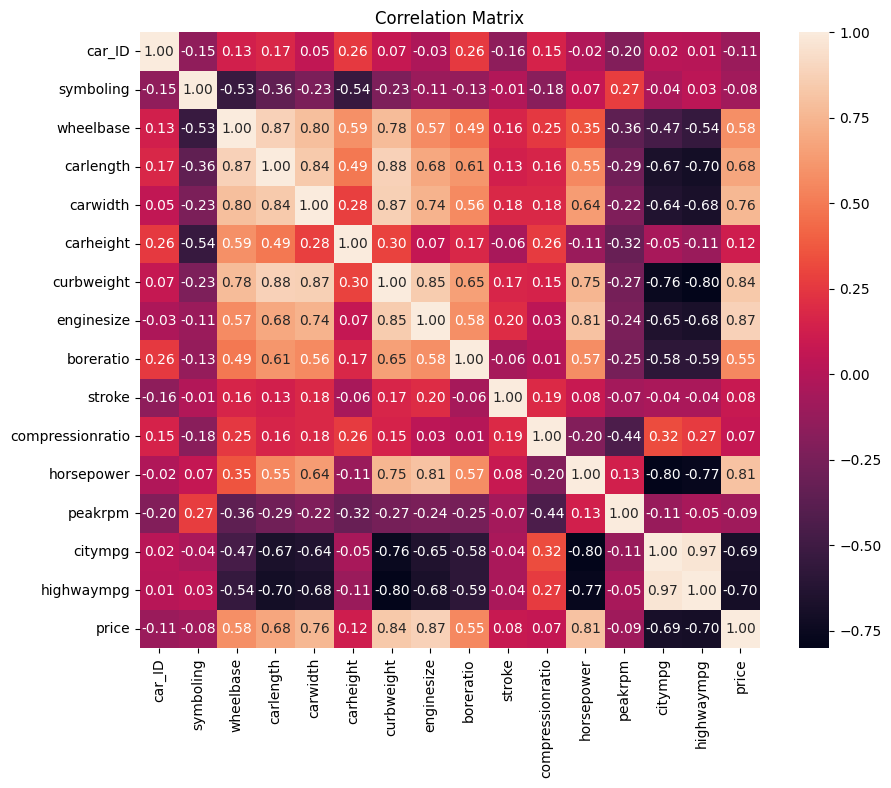

In [12]:
# Price distribution
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [13]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
cate = df.select_dtypes('object')

In [21]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in cate:
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [26]:
# Split features and target variable
X = df.drop('price', axis=1)
y = df['price'].values

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [30]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate RMSE and R^2 Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')


RMSE: 1838.835991494407
R^2 Score: 0.9571681583236088


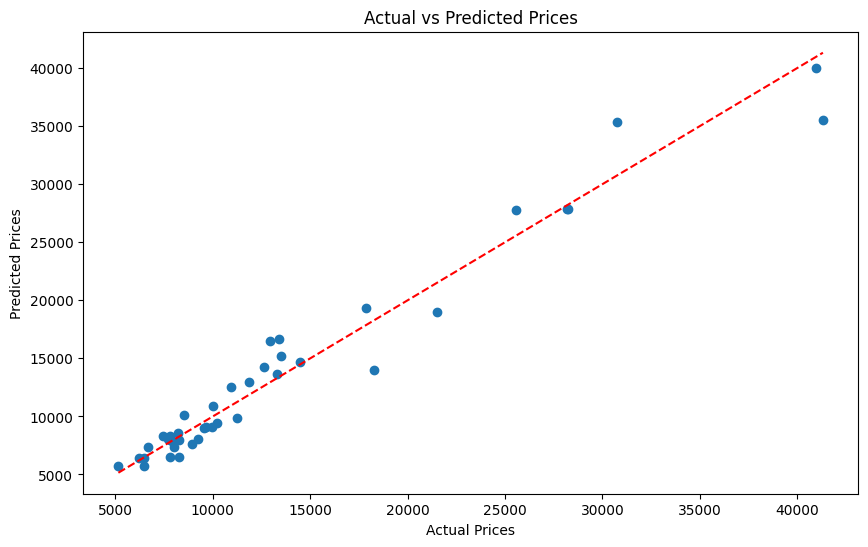

In [31]:
# Compare actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


# Experimenting with Different Regression Algorithms

In [34]:
# Define regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)}

In [35]:
# Train and evaluate each model
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} Cross-Validation R^2: {np.mean(cv_scores):.3f}")

Linear Regression Cross-Validation R^2: 0.865
Random Forest Cross-Validation R^2: 0.890
Gradient Boosting Cross-Validation R^2: 0.902


In [36]:
# Fit model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
# Calculate RMSE and R^2 Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [38]:
print(f"{name} RMSE: {rmse:.3f}")
print(f"{name} R^2 Score: {r2:.3f}\n")

Gradient Boosting RMSE: 2310.341
Gradient Boosting R^2 Score: 0.932



# Hyperparameter Tuning


In [39]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                               param_grid=rf_param_grid, 
                               cv=5, 
                               scoring='r2', 
                               n_jobs=-1)

rf_grid_search.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), 
                               param_grid=gb_param_grid, 
                               cv=5, 
                               scoring='r2', 
                               n_jobs=-1)

gb_grid_search.fit(X_train, y_train)
print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# Evaluate Best Models


In [40]:
# Evaluate the best Random Forest model
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Best Random Forest RMSE: {rmse_rf:.3f}")
print(f"Best Random Forest R^2 Score: {r2_rf:.3f}\n")

# Evaluate the best Gradient Boosting model
best_gb = gb_grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Best Gradient Boosting RMSE: {rmse_gb:.3f}")
print(f"Best Gradient Boosting R^2 Score: {r2_gb:.3f}")


Best Random Forest RMSE: 1834.207
Best Random Forest R^2 Score: 0.957

Best Gradient Boosting RMSE: 2310.341
Best Gradient Boosting R^2 Score: 0.932
